In [1]:
""" Importing libraries """
from ovito.io import *
from ovito.modifiers import *

import numpy as np

import matplotlib.pyplot as plt

In [2]:
""" Defining hard-coded variables (?) """
qq = np.linspace(0.07,0.1,20)

In [3]:
""" Loading input file into an Ovito pipeline """
pipeline_wetting = import_file("wetting.dump")
pipeline_wetting.modifiers.append(CommonNeighborAnalysisModifier())

In [4]:
""" Loop over simulation frames and do something """
for data in pipeline_wetting.frames:
    
    """ Example: output fraction of BCC phase using Common Neighbor Analysis """
    # n_bcc = data.attributes['CommonNeighborAnalysis.counts.BCC']
    # print(n_bcc / data.particles.count)
    
    coord_liq = data.particles.positions[data.particles['v_dummymol'] == 1]
    coord_liq = coord_liq[...]

    xmean_liq = np.mean(coord_liq[:,0])
    ymean_liq = np.mean(coord_liq[:,1])

    x_liq_rel = coord_liq[:,0]-xmean_liq
    y_liq_rel = coord_liq[:,1]-ymean_liq
    r_liq_rel = np.sqrt((x_liq_rel**2)+(y_liq_rel**2))

    rad_temp = np.mean(r_liq_rel)*(qq**2)
    # print(rad_temp)

    """ Example: average z corrdinate of liquid and solid
        (can be used for sanity checks) """
    # zmean_liq = np.mean(coord_liq[:,2])
    # print('z_avg_liq = ',zmean_liq,' [A]')
    # coord_sub = data.particles.positions[data.particles['v_dummymol'] == 2]
    # coord_sub = coord_sub[...]
    # zmean_sub = np.mean(coord_sub[:,2])
    # print('z_avg_sub = ',zmean_sub,' [A]')

[0.09802716 0.10249932 0.10707122 0.11174288 0.11651428 0.12138544
 0.12635635 0.131427   0.13659741 0.14186757 0.14723748 0.15270714
 0.15827655 0.16394571 0.16971462 0.17558328 0.1815517  0.18761986
 0.19378777 0.20005544]
[0.14092859 0.14735797 0.15393076 0.16064696 0.16750656 0.17450957
 0.18165598 0.1889458  0.19637903 0.20395567 0.21167571 0.21953916
 0.22754601 0.23569627 0.24398993 0.25242701 0.26100749 0.26973137
 0.27859866 0.28760936]
[0.11675117 0.12207754 0.12752271 0.13308669 0.13876948 0.14457106
 0.15049145 0.15653065 0.16268865 0.16896545 0.17536106 0.18187547
 0.18850868 0.1952607  0.20213152 0.20912115 0.21622958 0.22345681
 0.23080285 0.23826769]
[0.13484183 0.14099352 0.14728243 0.15370855 0.16027188 0.16697243
 0.17381019 0.18078516 0.18789735 0.19514674 0.20253335 0.21005717
 0.21771821 0.22551645 0.23345191 0.24152459 0.24973447 0.25808157
 0.26656588 0.2751874 ]
[0.15896575 0.16621802 0.17363205 0.18120784 0.18894539 0.1968447
 0.20490577 0.2131286  0.22151319 

<IPython.core.display.Javascript object>


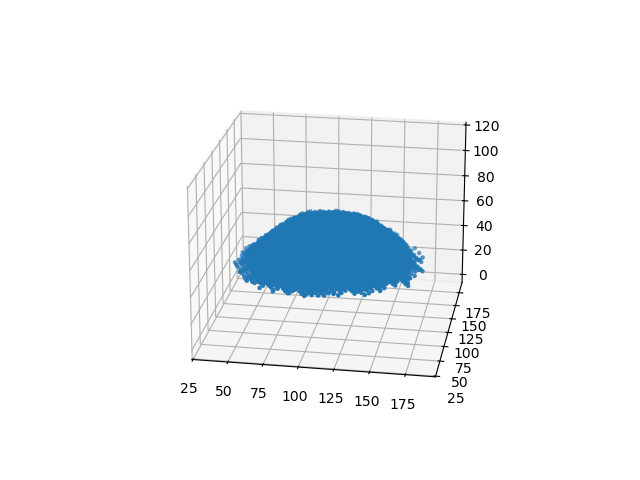

In [6]:
""" 3D scatterplot of the last fame """
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# ax.scatter(coord_sub[:,0],coord_sub[:,1],coord_sub[:,2],marker='.')
ax.scatter(coord_liq[:,0],coord_liq[:,1],coord_liq[:,2],marker='.')
plt.axis('equal')
plt.show()